C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\acer\AppData\Local\Prog

Mean Squared Error: 147958.15590572899
Root Mean Squared Error: 384.65329311696917
Mean Absolute Error: 340.7785880496083
R-squared: -2.17512142504936


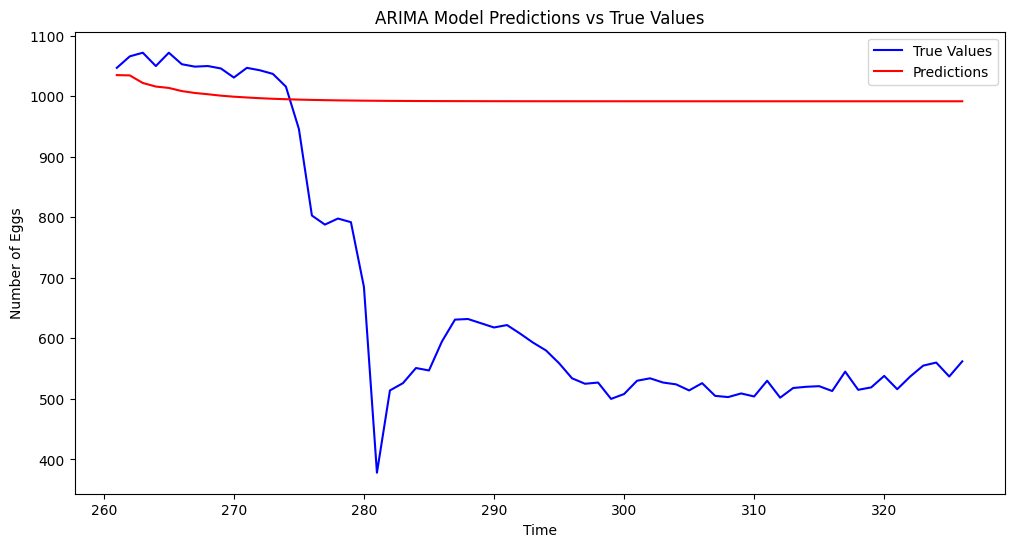

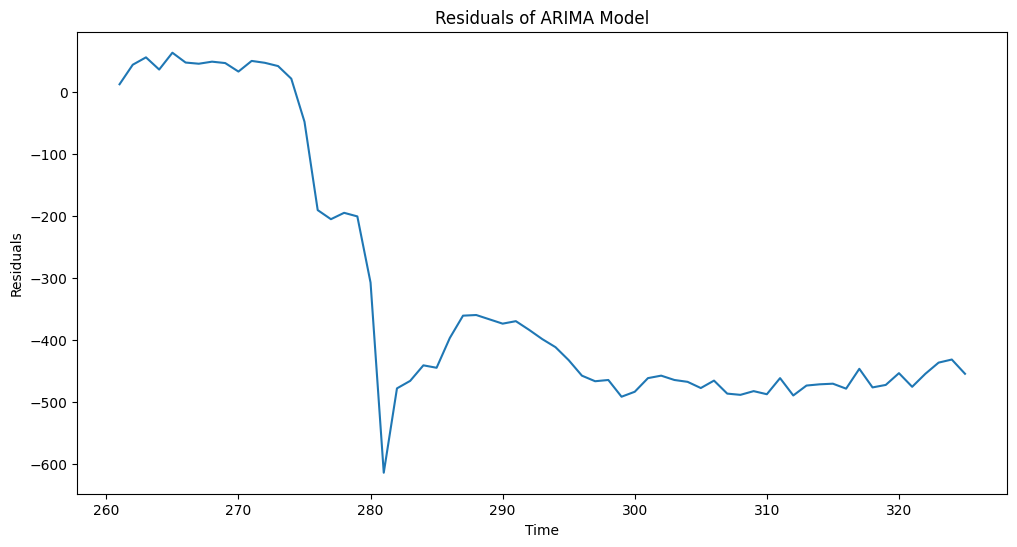

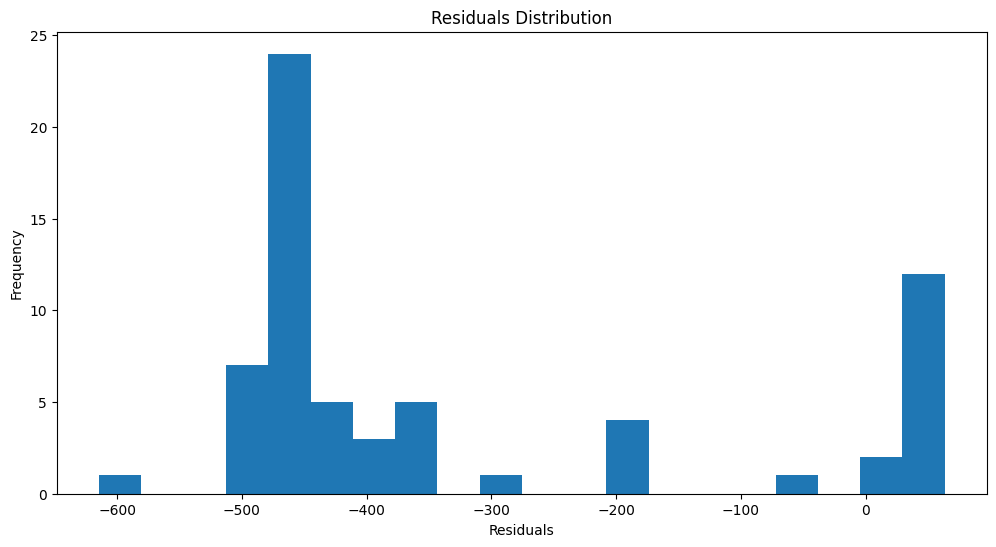

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
file_path = r'C:\Users\acer\Desktop\jupyter\DATA-OF-EGGS.csv'
df = pd.read_csv(file_path)

# Remove commas and convert to float
df['noeggs'] = df['noeggs'].astype(str).str.replace(',', '').astype(float)

# Create lag feature and handle missing values
df['lag_1'] = df['noeggs'].shift(1)
df.dropna(subset=['lag_1'], inplace=True)

# Define time series
data = df['noeggs']

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(5,1,0))  # Adjust order as necessary
model_fit = model.fit()

# Generate predictions
forecast = model_fit.forecast(steps=len(test))

# Evaluate predictive performance
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)

# Calculate R-squared
sse = np.sum((test - forecast) ** 2)
sst = np.sum((test - np.mean(test)) ** 2)
r_squared = 1 - (sse / sst)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r_squared}')

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(test):], test, label='True Values', color='blue')
plt.plot(data.index[-len(test):], forecast, label='Predictions', color='red')
plt.title('ARIMA Model Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Number of Eggs')
plt.legend()
plt.show()

# Plot residuals
residuals = test - forecast
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Optional: Plot residuals distribution
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=20)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [36]:
from pmdarima import auto_arima

# Fit auto ARIMA model
auto_model = auto_arima(train, seasonal=False, trace=True,
                         error_action='ignore', suppress_warnings=True)

# Print the best model
print(auto_model.summary())

# Generate predictions
forecast = auto_model.predict(n_periods=len(test))

# Evaluate predictive performance
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)

# Calculate R-squared
sse = np.sum((test - forecast) ** 2)
sst = np.sum((test - np.mean(test)) ** 2)
r_squared = 1 - (sse / sst)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r_squared}')


ModuleNotFoundError: No module named 'pmdarima'